<a href="https://colab.research.google.com/github/anagjurchinova/DataScience_2025/blob/main/Laboratory_exercise_2_Introduction_to_Data_Science_(15_11_2023_14_00).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requirements

In [41]:
import pandas as pd
import missingno as msno
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
# Add as many imports as you need.

# Laboratory Exercise - Run Mode (8 points)

## Introduction
The analysis of Spotify songs, characterized by a rich set of features such as danceability, energy, and valence, holds significant importance in the realm of music research, entertainment, and data-driven decision-making. Understanding the musical attributes of songs through data analysis provides valuable insights into user preferences, genre trends, and the overall landscape of the music industry. This type of analysis contributes to personalized recommendations for users, enhancing their music discovery experience. Moreover, it aids music producers and artists in tailoring their creations to align with popular trends and audience preferences. Additionally, the exploration of Spotify song data has the potential to uncover patterns, correlations, and anomalies that can inform marketing strategies, playlist curation, and even influence the strategic planning of music events. Overall, the analysis of Spotify songs is instrumental in leveraging data to enhance user experiences, guide artistic endeavors, and inform strategic decisions within the dynamic and ever-evolving music industry.

## The Spotify Songs Dataset

## Downloading the Spotify Songs Dataset

In [2]:
!gdown 1ayxWv-hlQdzGoHMnrtNWRae9YxlTFP-_ # Download the dataset.

Downloading...
From: https://drive.google.com/uc?id=1ayxWv-hlQdzGoHMnrtNWRae9YxlTFP-_
To: /content/spotify-songs.csv
100% 1.82M/1.82M [00:00<00:00, 15.2MB/s]


## Exploring the Spotify Songs Dataset
The dataset consists of information on more than 30,000 songs obtained from the Spotify API, with various musical features and genres. The features include danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence, tempo, and genre. Each feature provides insights into different aspects of the songs, such as danceability, intensity, loudness, presence of spoken words, acoustic nature, instrumental content, live performance likelihood, musical positiveness, tempo, and genre. All these features except 'genre' serve as input variables for potential analysis and modeling. The 'genre' attribute serves as the target variable, representing the song genre to be predicted. The dataset offers a comprehensive collection of attributes, making it suitable for exploring and understanding the musical characteristics of a diverse range of songs.

Load the dataset into a `pandas` data frame.

In [3]:
# Write your code here. Add as many boxes as you need.
data = pd.read_csv('/content/spotify-songs.csv')

Encode the target variable using the `LabelEncoder` from the `scikit-learn` library.

In [7]:
# Write your code here. Add as many boxes as you need.
encoder = LabelEncoder()
encoded_values = encoder.fit_transform(data['genre'])

data['genre'] = encoded_values
data

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,0.748,0.916,-2.634,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,2
1,0.726,NaN,-4.969,0.0373,0.072400,NaN,0.3570,0.6930,99.972,2
2,0.675,0.931,-3.432,0.0742,0.079400,NaN,0.1100,0.6130,124.008,2
3,0.718,0.930,-3.778,0.1020,0.028700,0.000009,0.2040,0.2770,NaN,2
4,0.650,0.833,-4.672,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,2
...,...,...,...,...,...,...,...,...,...,...
32828,0.428,NaN,-1.814,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,0
32829,0.522,0.786,-4.462,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,0
32830,0.529,0.821,-4.899,0.0481,0.108000,NaN,0.1500,0.4360,127.989,0
32831,0.626,NaN,NaN,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,0


Explore the dataset using visualizations of your choice.

In [8]:
# Write your code here. Add as many boxes as you need.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      29171 non-null  float64
 1   energy            21572 non-null  float64
 2   loudness          25213 non-null  float64
 3   speechiness       30472 non-null  float64
 4   acousticness      31939 non-null  float64
 5   instrumentalness  26363 non-null  float64
 6   liveness          29847 non-null  float64
 7   valence           25344 non-null  float64
 8   tempo             26276 non-null  float64
 9   genre             32833 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 2.5 MB


In [9]:
data.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
count,29171.000000,21572.000000,25213.000000,30472.000000,31939.000000,26363.000000,29847.000000,25344.000000,26276.000000,32833.000000
mean,0.655237,0.697964,-6.700534,0.107035,0.175157,0.083894,0.190442,0.510760,120.905999,2.442695
std,0.145108,0.180924,2.975182,0.101335,0.219659,0.223003,0.154312,0.233063,26.968530,1.708774
min,0.000000,0.000175,-36.624000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.563000,0.582000,-8.149000,0.041100,0.015000,0.000000,0.092900,0.330000,99.946000,1.000000
50%,0.672000,0.721000,-6.164000,0.062500,0.080200,0.000016,0.127000,0.512000,121.978000,2.000000
75%,0.761000,0.839000,-4.632000,0.132000,0.254000,0.004810,0.249000,0.694000,133.986250,4.000000
max,0.983000,1.000000,1.275000,0.918000,0.994000,0.994000,0.994000,0.990000,220.252000,5.000000


In [10]:
data.isnull().mean() * 100

,0
danceability,11.153413
energy,34.297810
loudness,23.208357
speechiness,7.190936
acousticness,2.722870
instrumentalness,19.705784
liveness,9.094509
valence,22.809369
tempo,19.970761
genre,0.000000


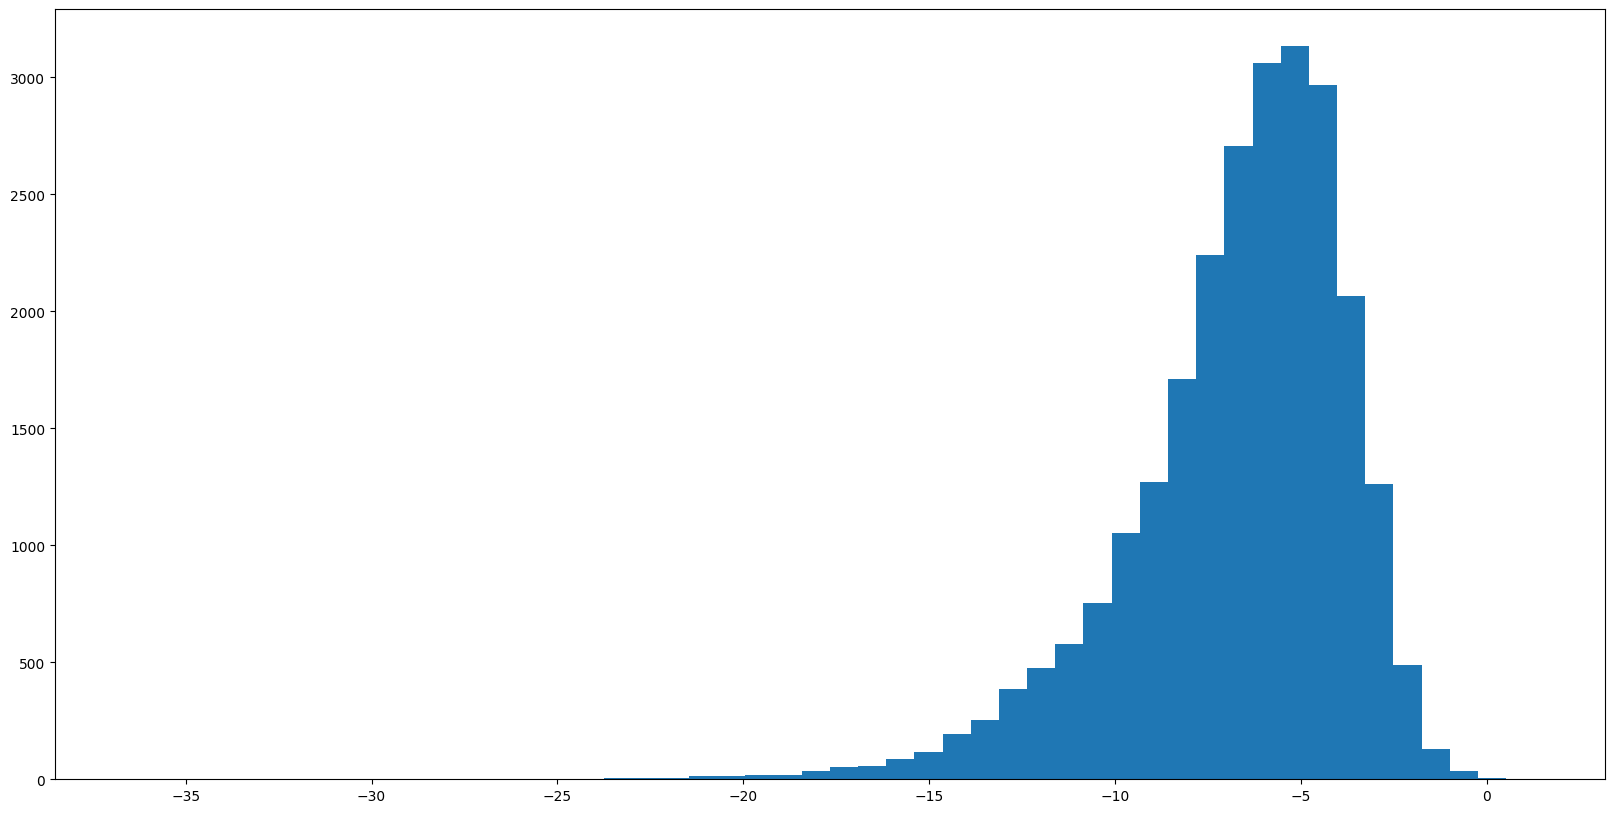

In [14]:
plt.figure(figsize=(20, 10))
plt.hist(data['loudness'], bins=50)
plt.show()

# skewed distribution

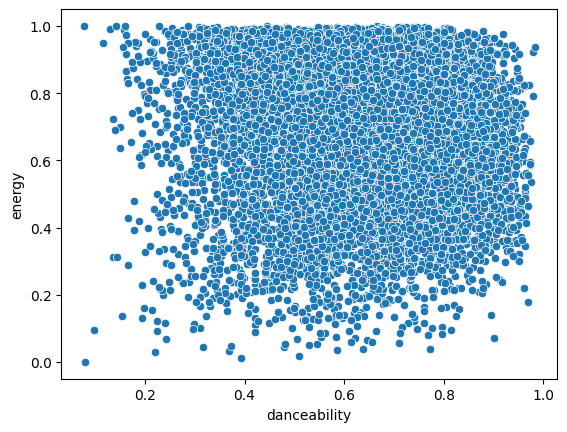

In [16]:
sns.scatterplot(data=data, x='danceability', y='energy')
plt.show()

# high dispersion, no visual trends or correlation, no different values for energy in different levels of danceability

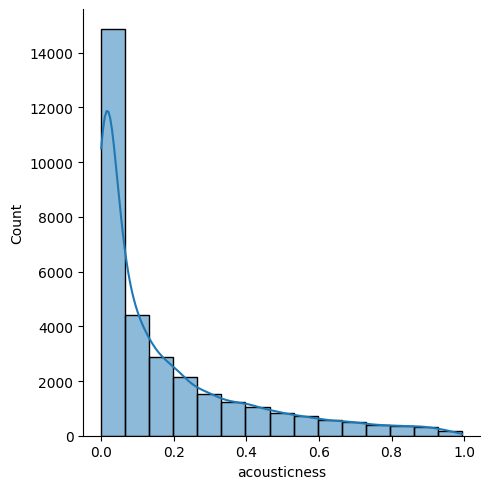

In [17]:
sns.displot(data['acousticness'], kde=True, bins=15)
plt.show()

# most of the music in the dataset does not contain acoustic instruments.
# the distribution is skewed on the right, assymetrical data consisting of more low values.

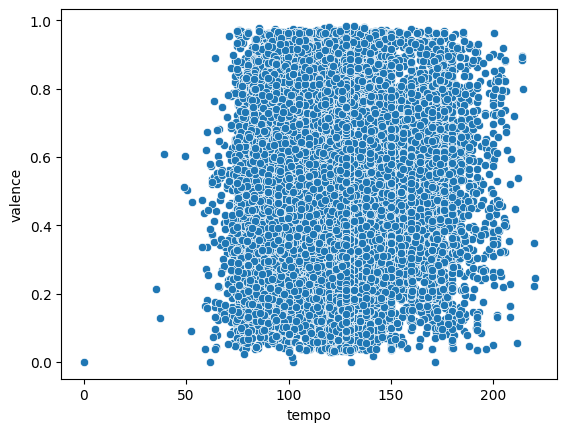

In [21]:
sns.scatterplot(data=data, x='tempo', y='valence')
plt.show()

# high dispersion, no visual trends or correlation, for ex. high value in tempo does not suggest high value in valence (if the tempo is around 100,
# the valence has the same chances being both around 0.1 and 0.9)

Check if the dataset is balanced.

In [22]:
# Write your code here. Add as many boxes as you need.
genre_counts = data.groupby('genre').size()
genre_counts

,0
genre,
0,6043
1,5155
2,5507
3,5431
4,5746
5,4951


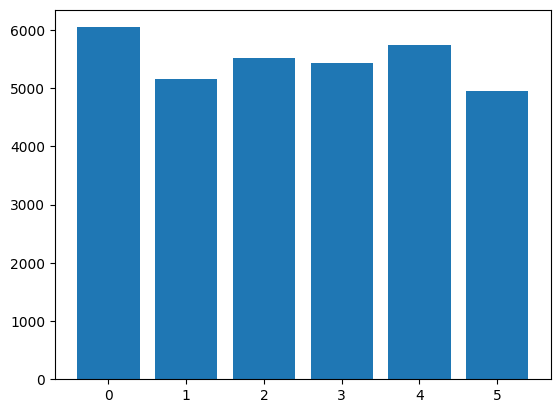

In [26]:
plt.bar(genre_counts.index.astype(str), genre_counts)
plt.show()

# The dataset is balanced. There are approximately same number of records of each target class.
# A balanced dataset is important so that the machine learning algorithm can predict each of the classes with an approximately same score.
# If the dataset is not balanced and we have very few records of a certain category, our model can learn to predict that category badly.

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [27]:
# Write your code here. Add as many boxes as you need.
data.isnull().mean() * 100

,0
danceability,11.153413
energy,34.297810
loudness,23.208357
speechiness,7.190936
acousticness,2.722870
instrumentalness,19.705784
liveness,9.094509
valence,22.809369
tempo,19.970761
genre,0.000000


## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts. To achieve this use the `missingno` library.

<Axes: >

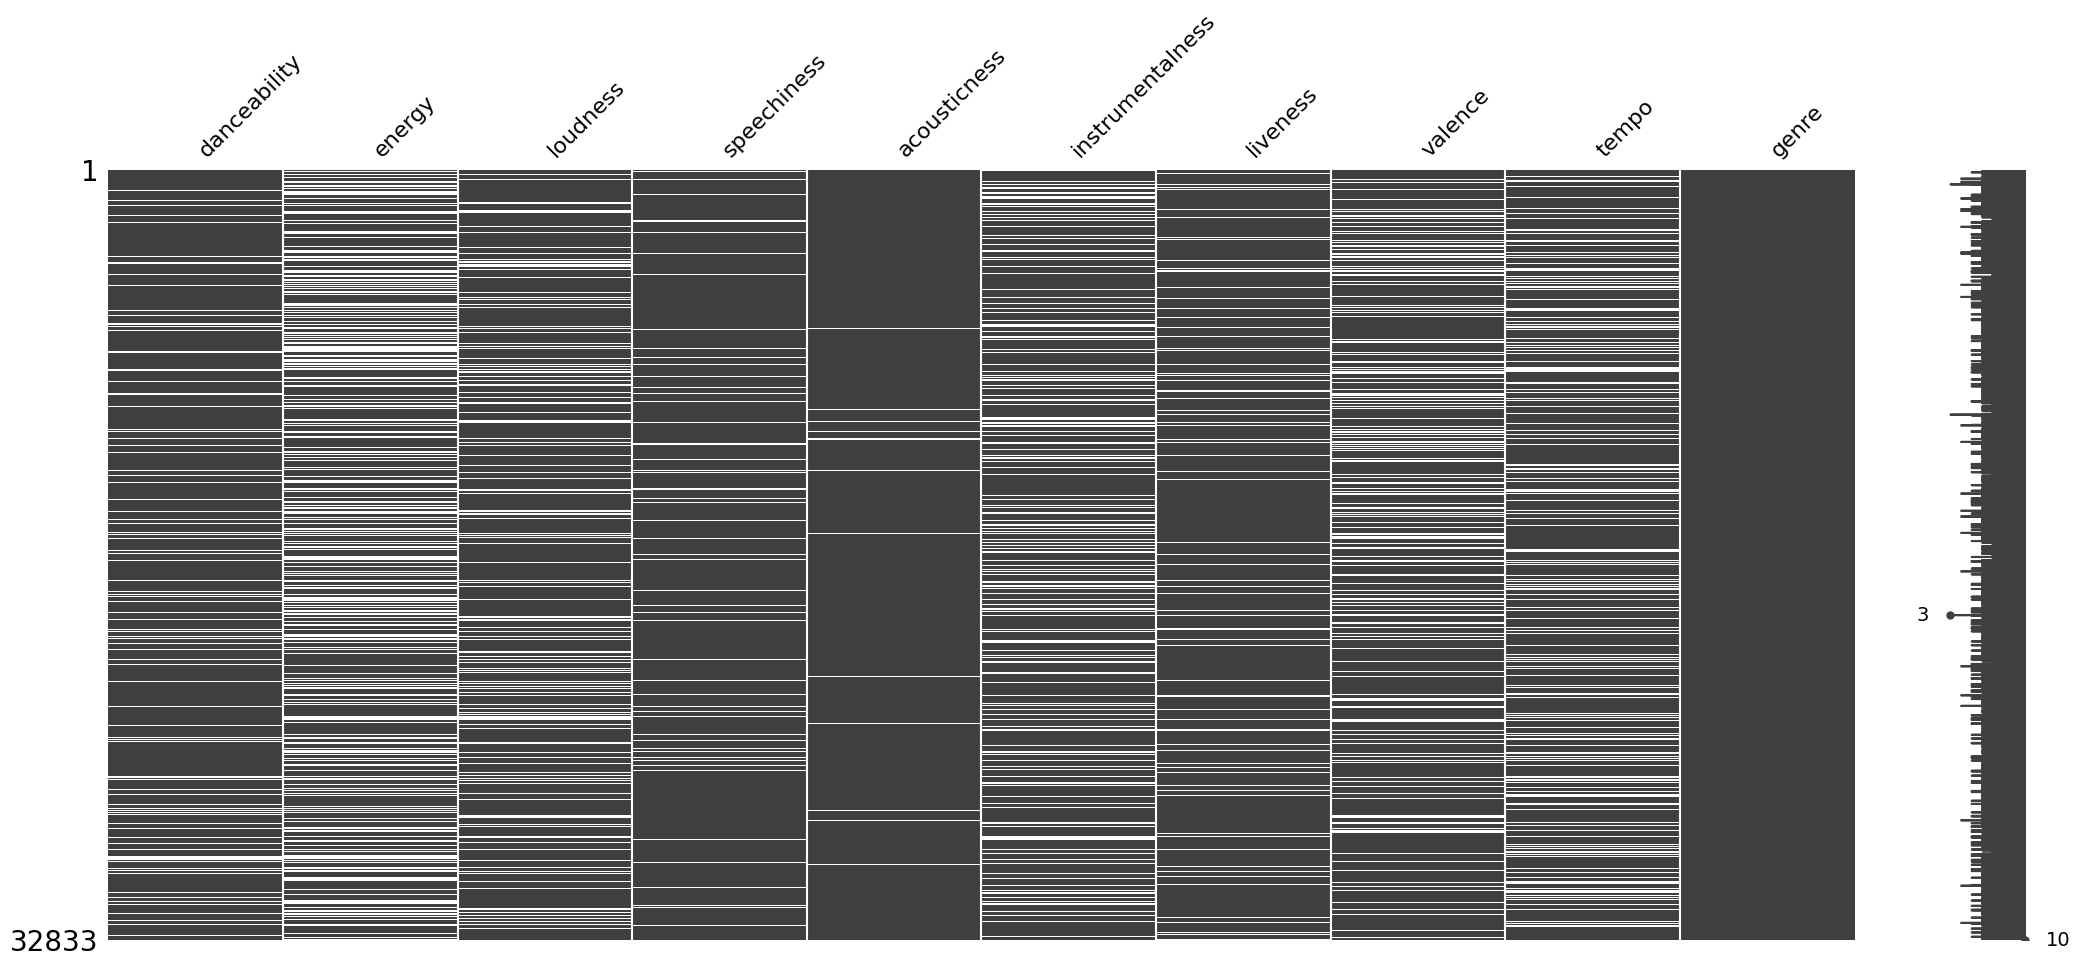

In [28]:
# Write your code here. Add as many boxes as you need.
msno.matrix(data)

# On the matrix we can kind of see similarities between instrumentalness and tempo and maybe speechiness and liveness.

<Axes: >

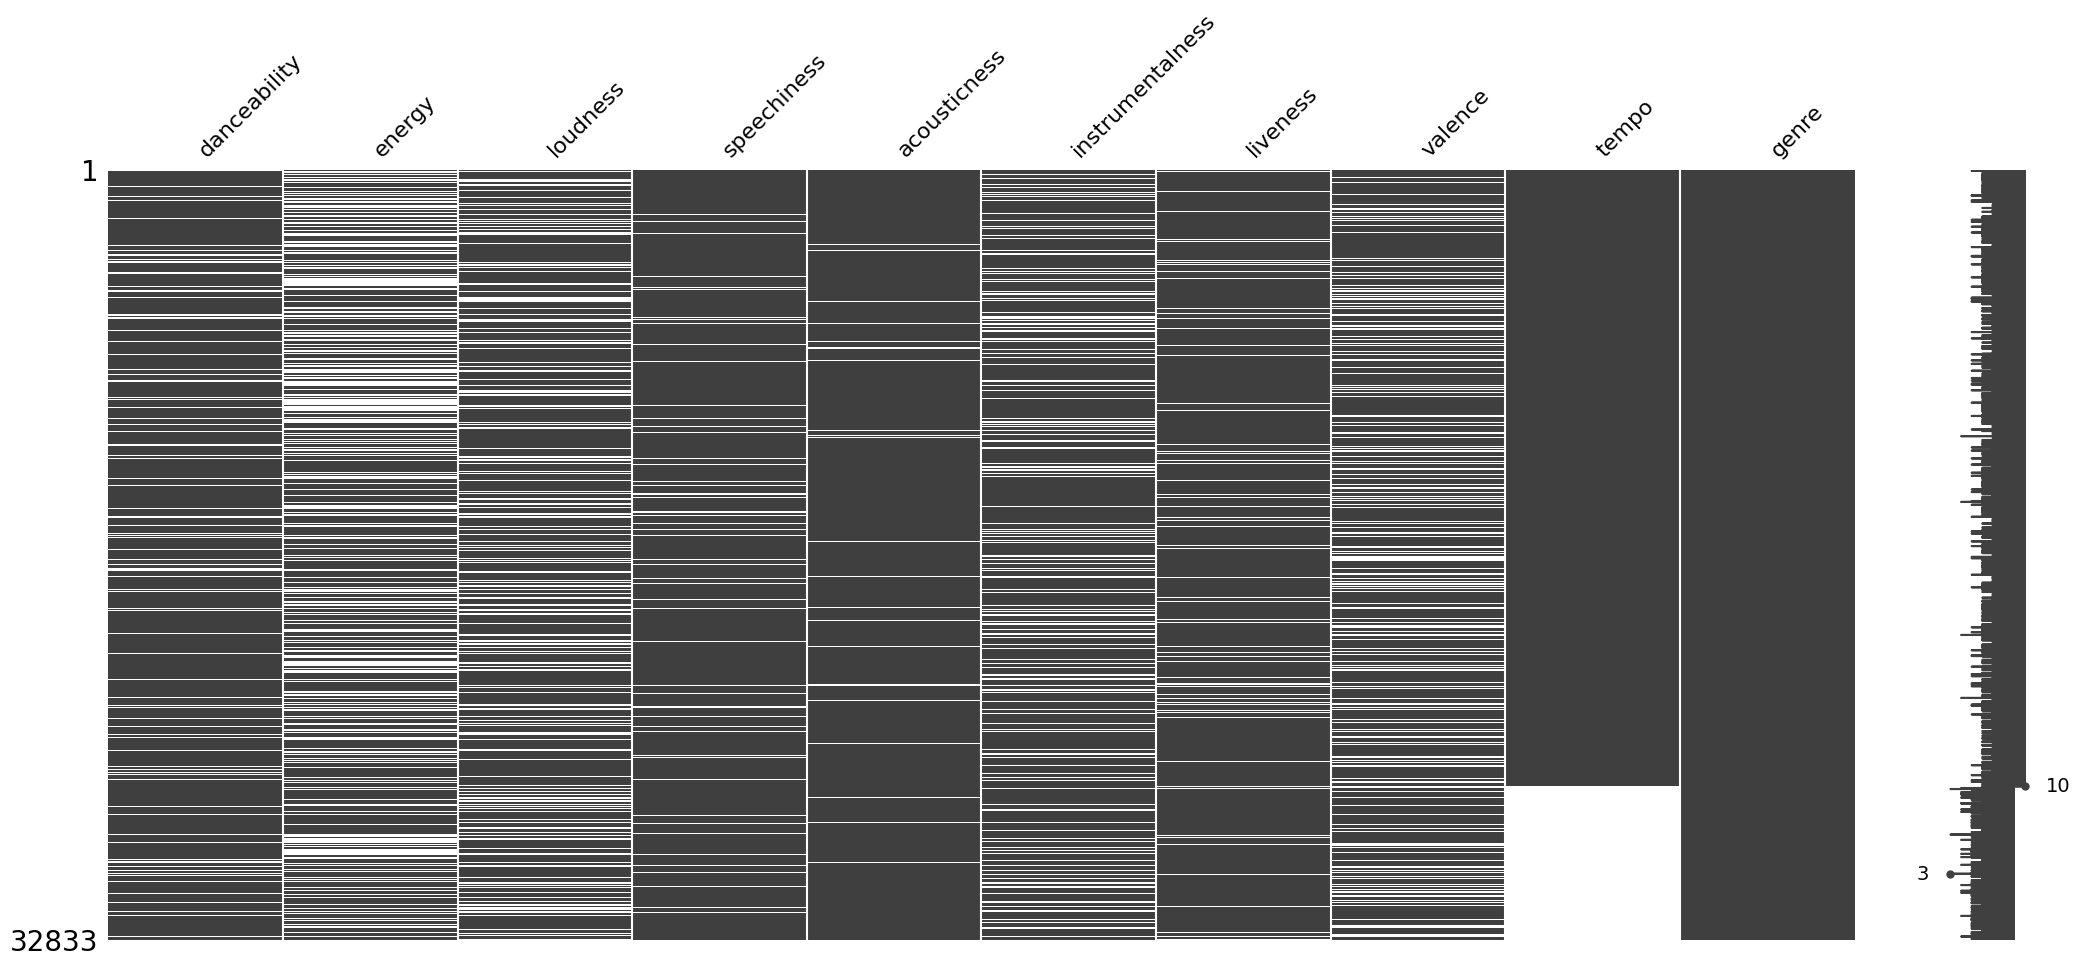

In [32]:
msno.matrix(data.sort_values('tempo'))

<Axes: >

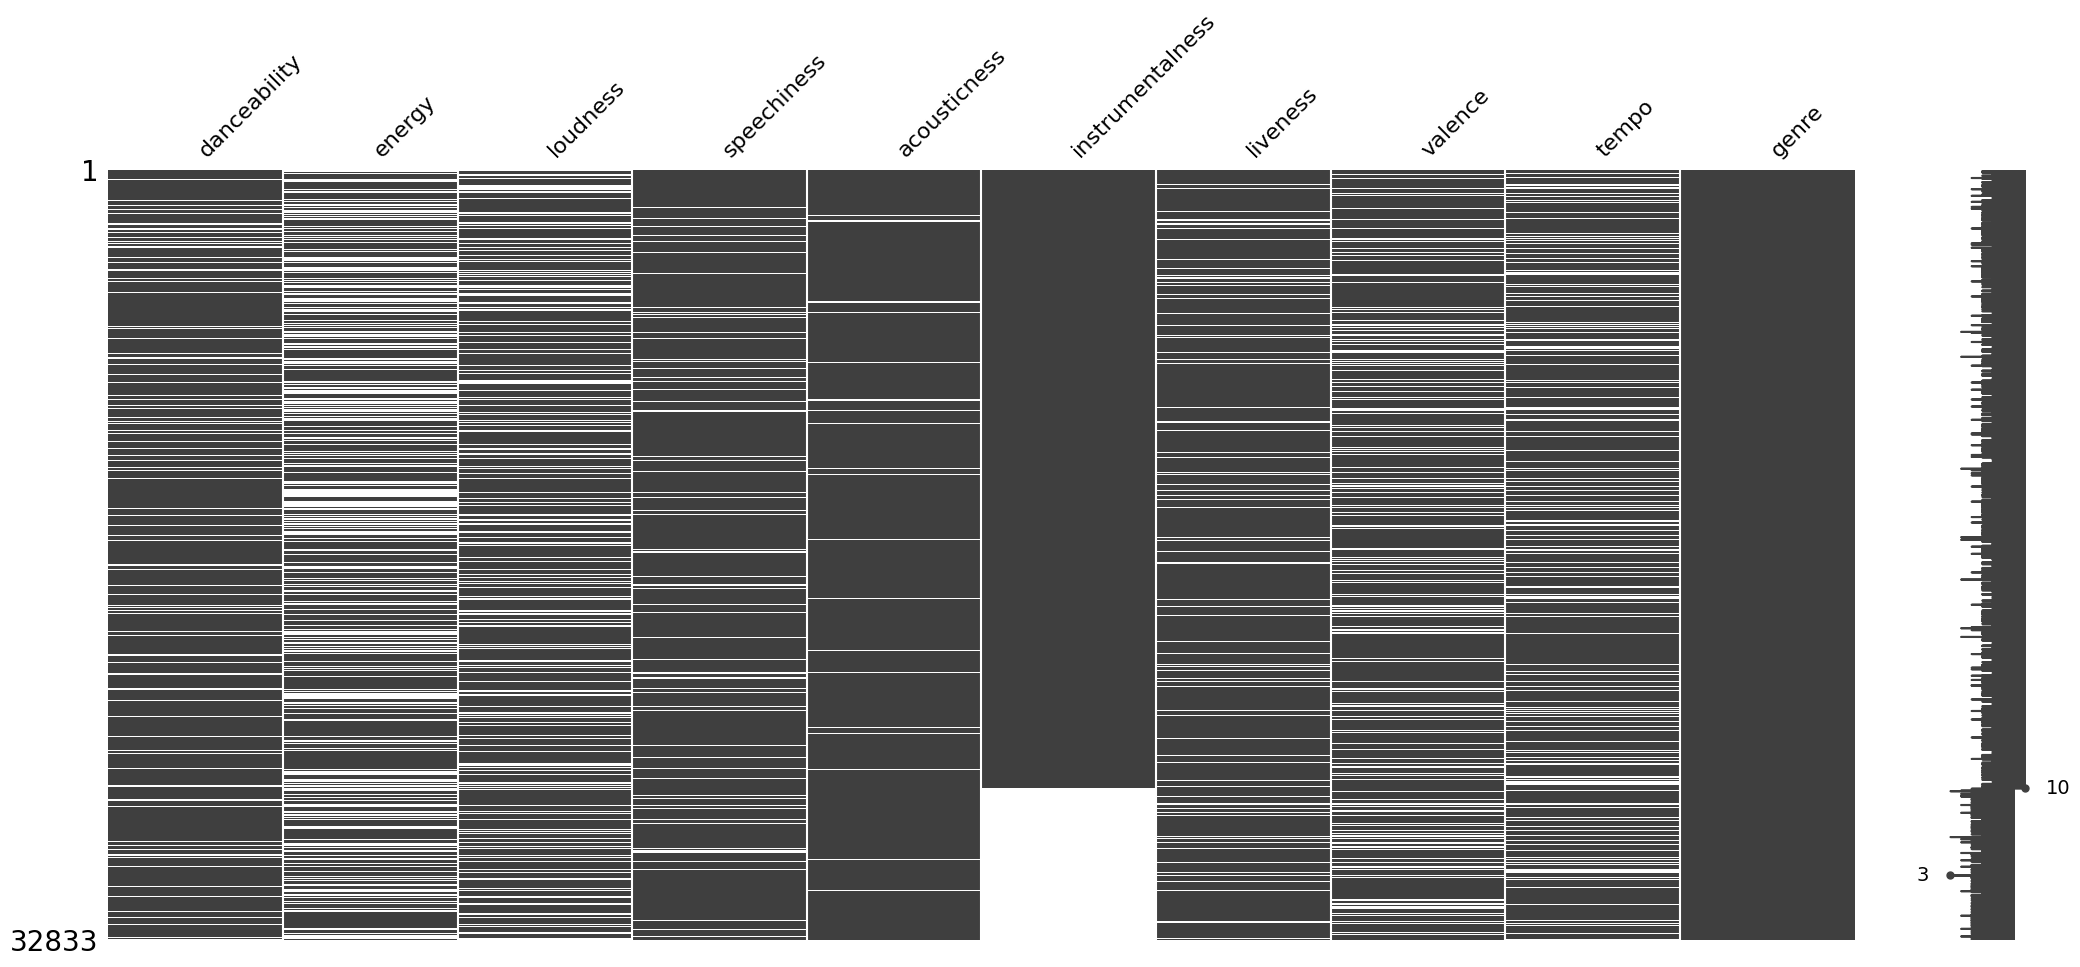

In [34]:
msno.matrix(data.sort_values('instrumentalness'))

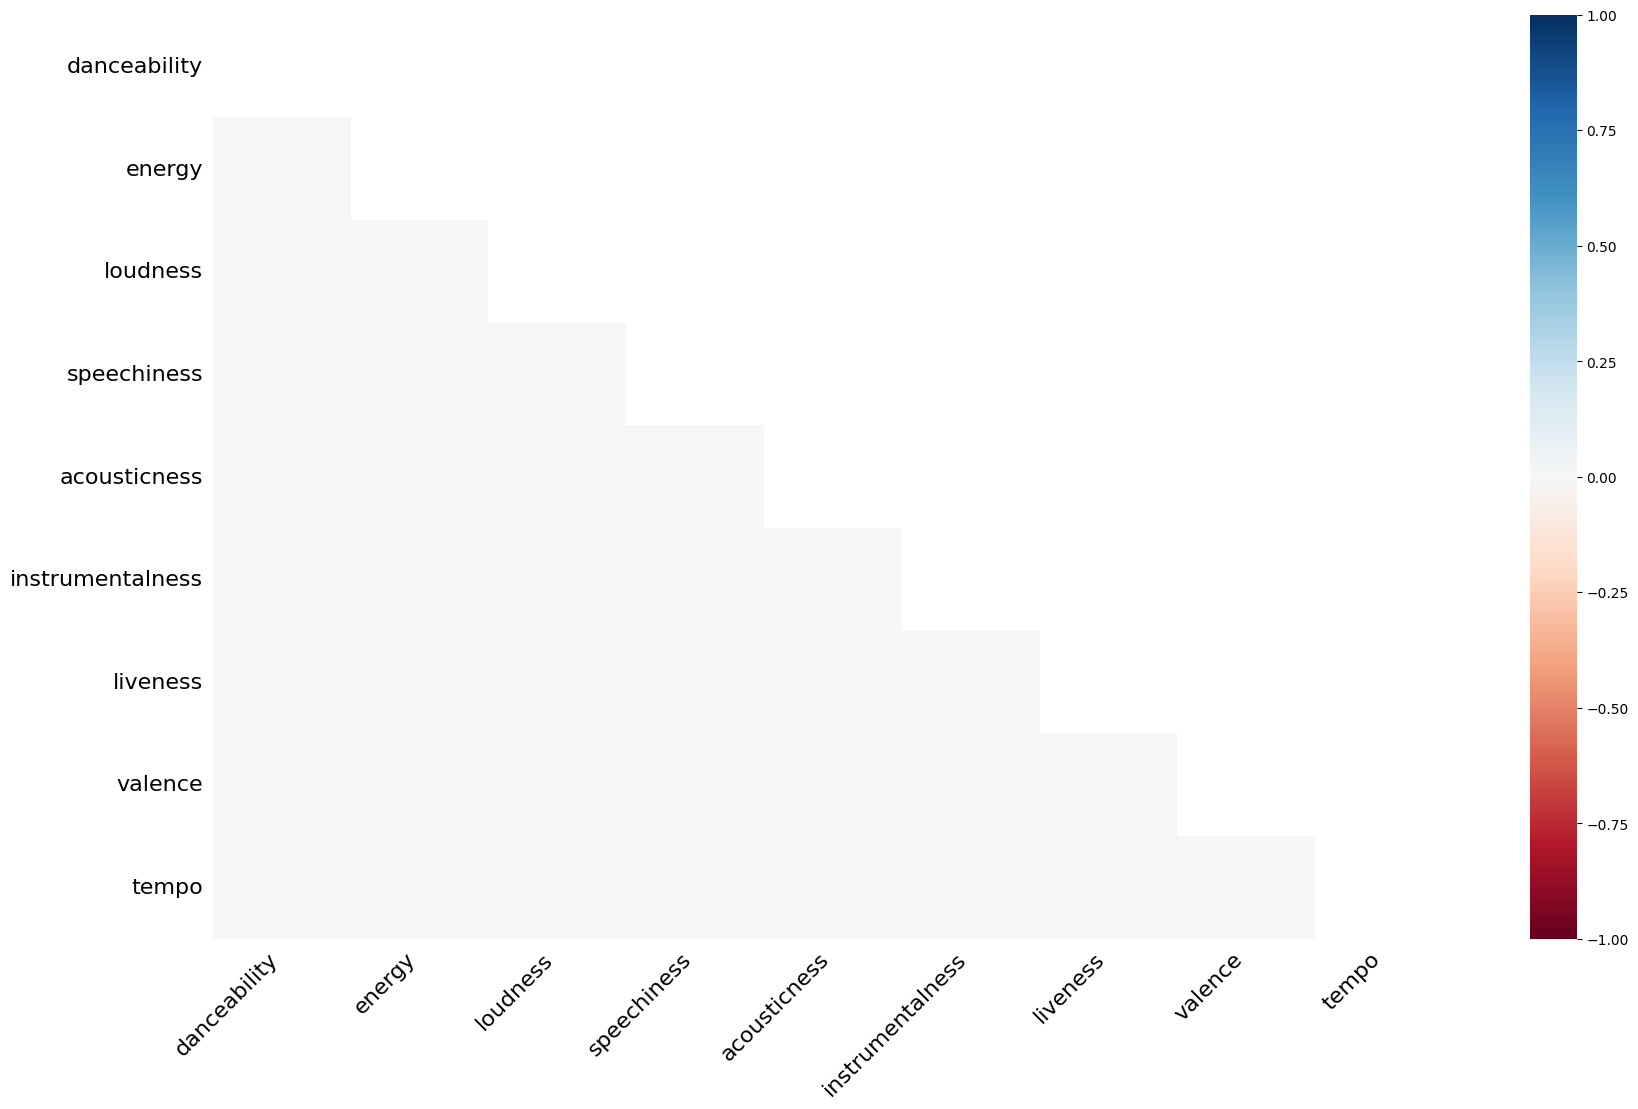

In [35]:
msno.heatmap(data)
plt.show()

# None of the attributes are actually correlated. Might be MCAR.

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

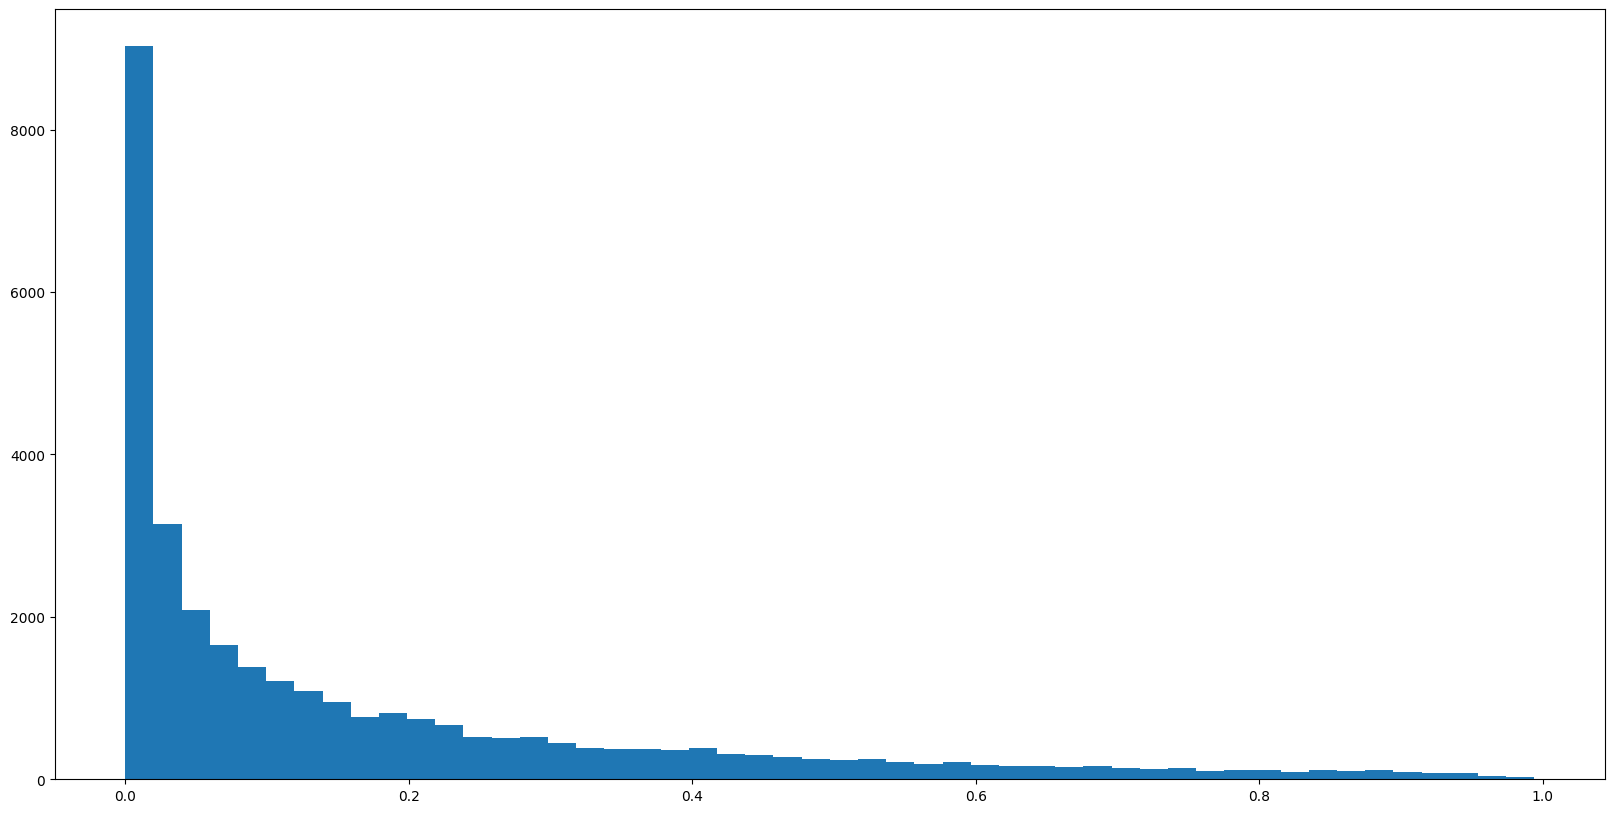

In [38]:
# Write your code here. Add as many boxes as you need.
plt.figure(figsize=(20, 10))
plt.hist(data['acousticness'], bins=50)
plt.show()

# The distribution is skewed, and we have no correlation between other variables so we are going to imput the median to handle the missing values.

In [47]:
data['acousticness'] = data['acousticness'].fillna(data['acousticness'].median())
data['acousticness'].isnull().sum()

0

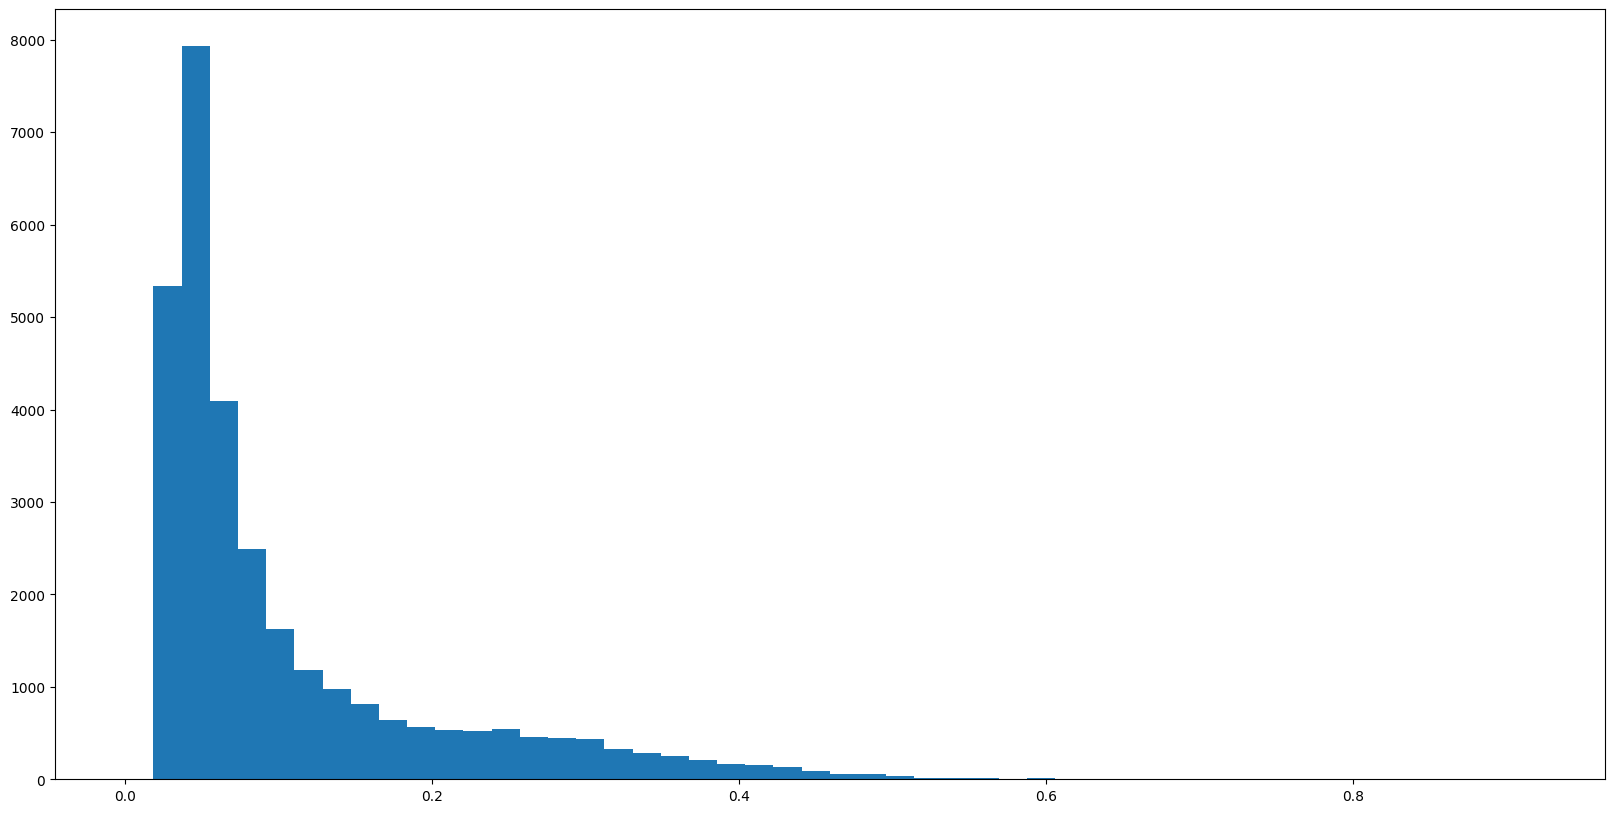

In [50]:
plt.figure(figsize=(20, 10))
plt.hist(data['speechiness'], bins=50)
plt.show()

In [51]:
data['speechiness'] = data['speechiness'].fillna(data['speechiness'].median())
data['speechiness'].isnull().sum()

0

In [52]:
data['liveness'] = data['liveness'].fillna(data['liveness'].median())
data['liveness'].isnull().sum()

0

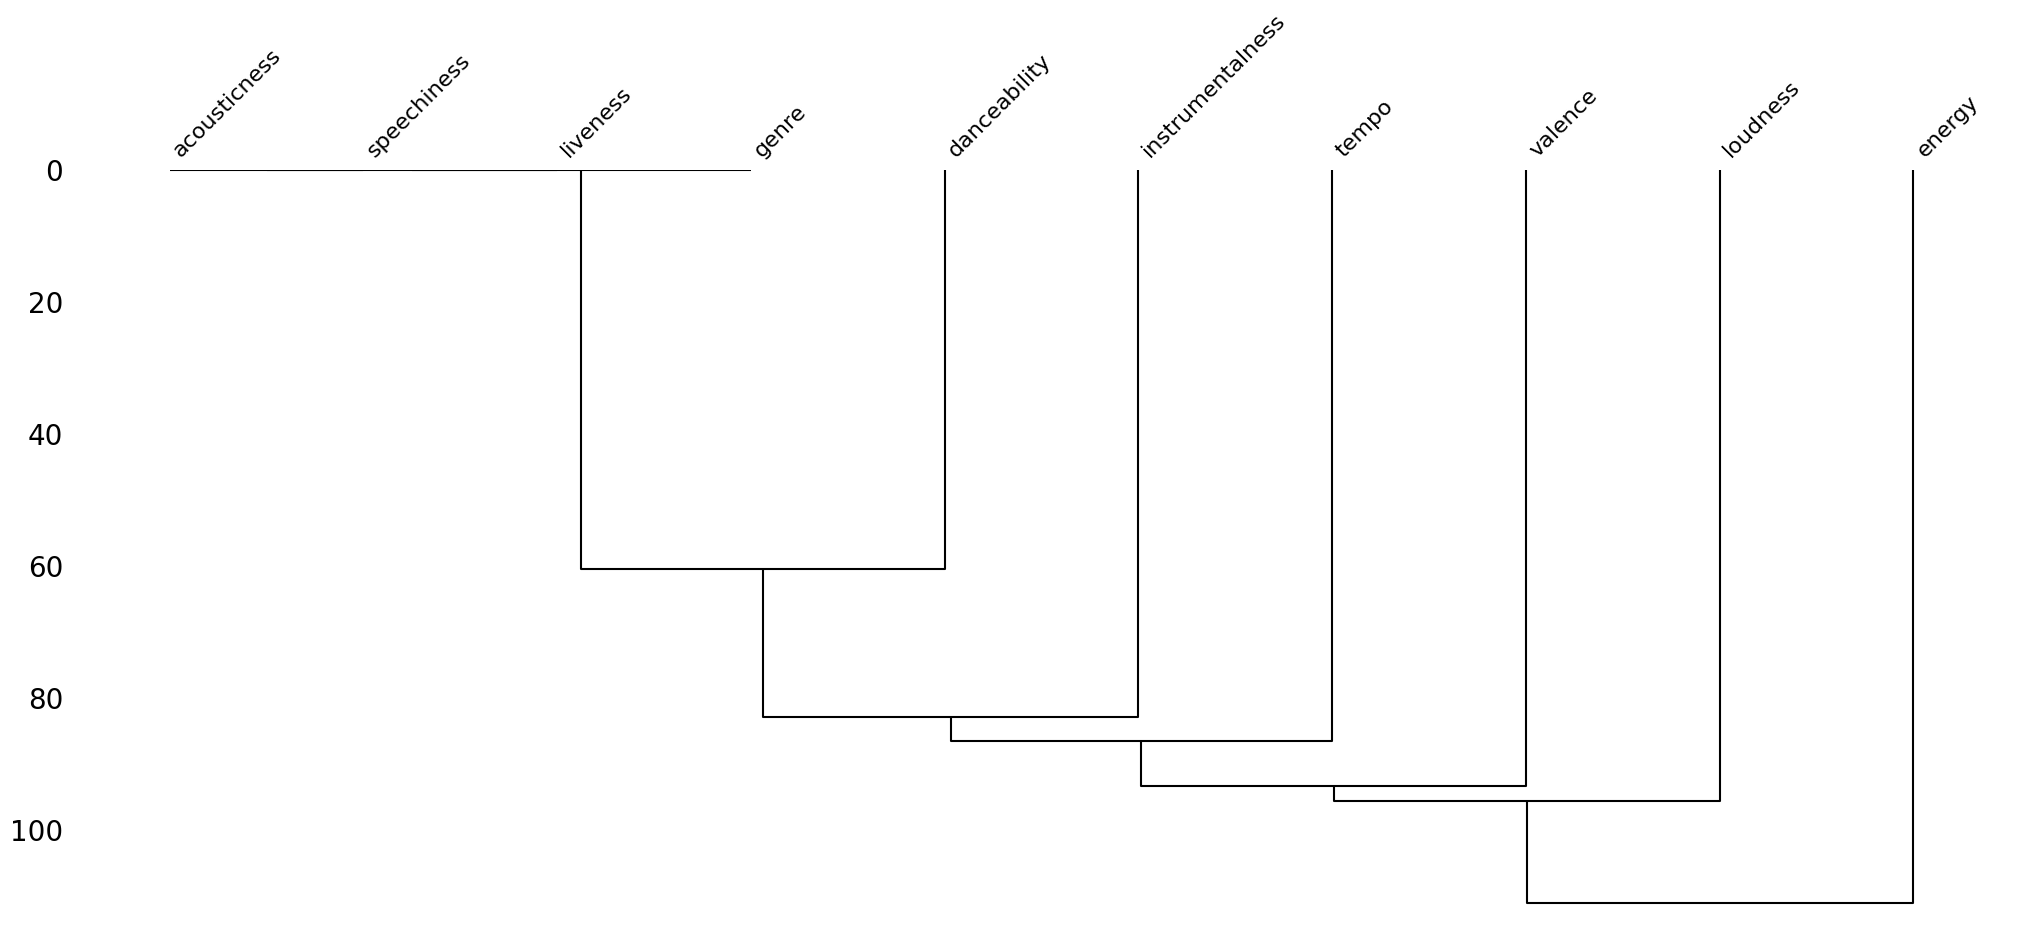

In [55]:
msno.dendrogram(data)
plt.show()

# the energy attribute differs most from the rest.
# Subgroup: acousticness, speechiness, liveness, genre - most similar, we used median imputation because of their low correlation and very few missing values.
# Subgroup 2: Danceability, liveness - second most similar, a bit more missing values - we can use MICE or KNN for imputing missing values.

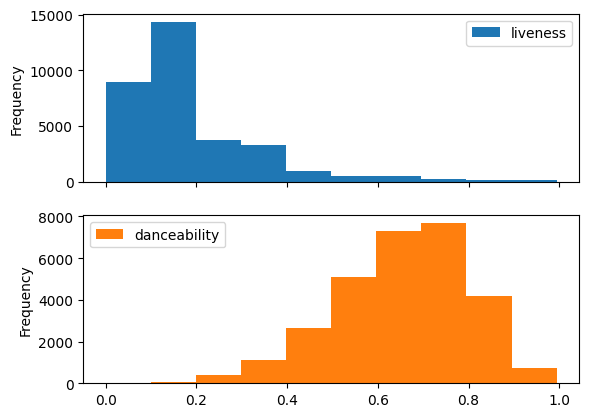

In [62]:
data[['liveness', 'danceability']].plot.hist(subplots=True)
plt.show()

# We don't need to scale the values, they are already in a close range of [0,1)

In [63]:
knn_imputer = KNNImputer(n_neighbors=5)
imputed_data = knn_imputer.fit_transform(data[['liveness', 'danceability']])

In [64]:
imputed_data

array([[0.0653, 0.748 ],
       [0.357 , 0.726 ],
       [0.11  , 0.675 ],
       ...,
       [0.15  , 0.529 ],
       [0.343 , 0.626 ],
       [0.742 , 0.603 ]])

In [65]:
data[['liveness', 'danceability']] = imputed_data

In [66]:
data.isnull().sum()

,0
danceability,0
energy,11261
loudness,7620
speechiness,0
acousticness,0
instrumentalness,6470
liveness,0
valence,7489
tempo,6557
genre,0


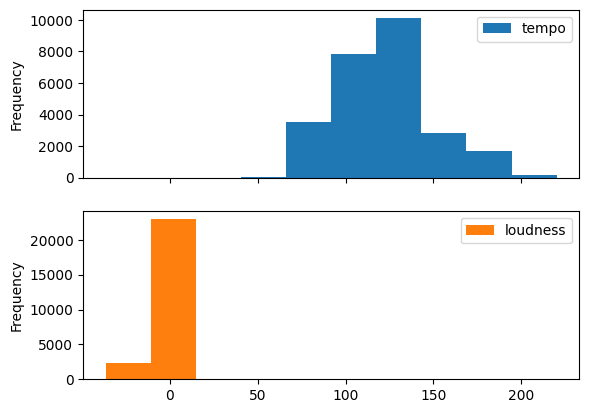

In [69]:
data[['tempo', 'loudness']].plot.hist(subplots=True)
plt.show()

# both skewed

In [70]:
data['tempo'] = data['tempo'].fillna(data['tempo'].median())
data['loudness'] = data['loudness'].fillna(data['loudness'].median())

data.isnull().sum()

,0
danceability,0
energy,11261
loudness,0
speechiness,0
acousticness,0
instrumentalness,6470
liveness,0
valence,7489
tempo,0
genre,0


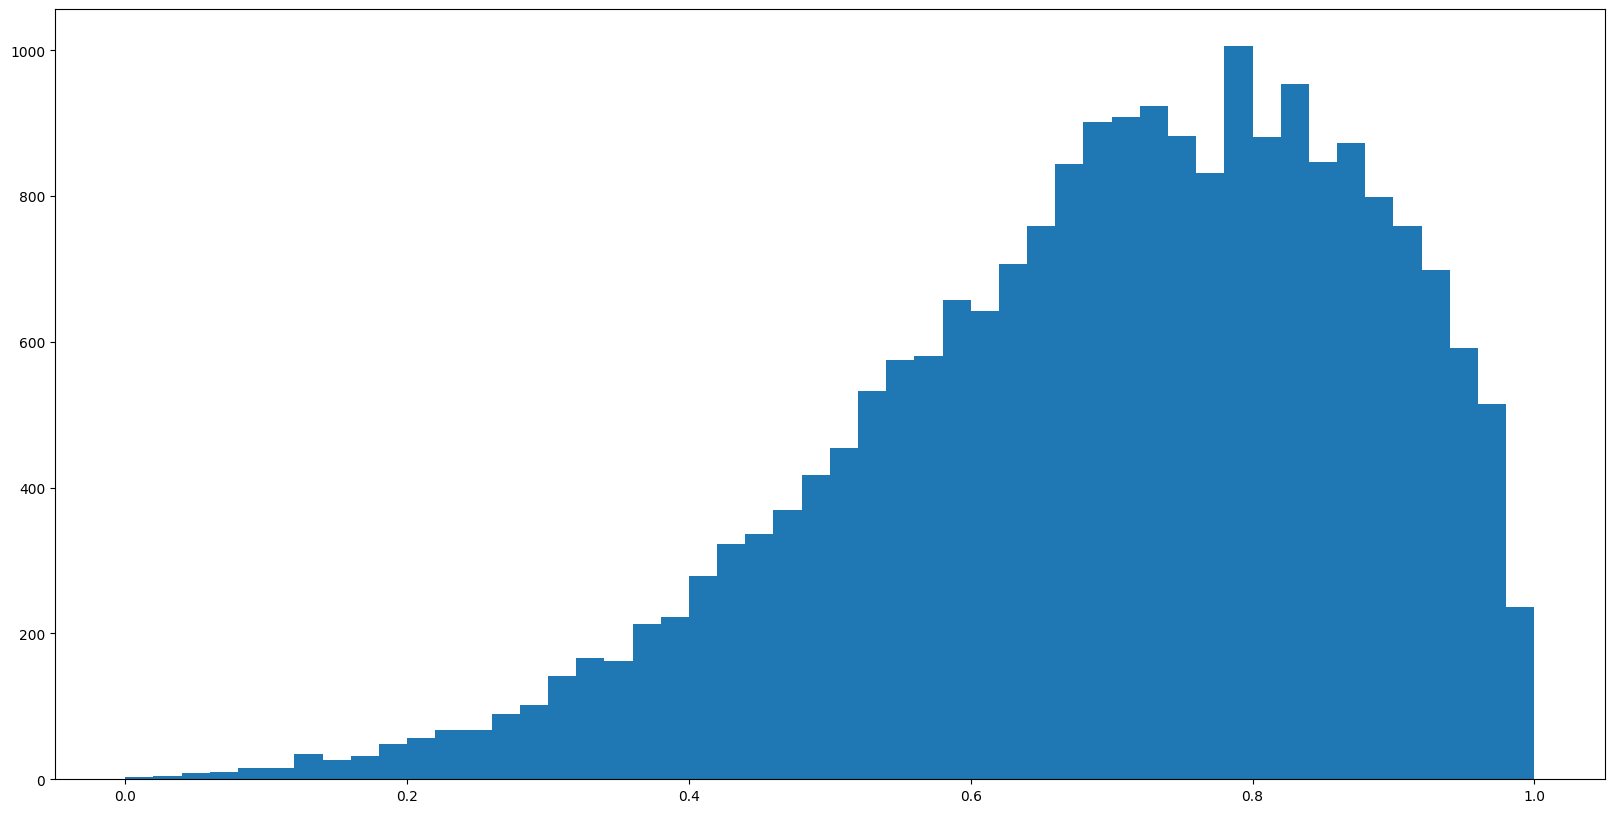

In [74]:
plt.figure(figsize=(20, 10))
plt.hist(data['energy'], bins=50)
plt.show()

In [75]:
data['energy'] = data['energy'].fillna(data['energy'].median())
data.isnull().sum()

,0
danceability,0
energy,0
loudness,0
speechiness,0
acousticness,0
instrumentalness,6470
liveness,0
valence,7489
tempo,0
genre,0


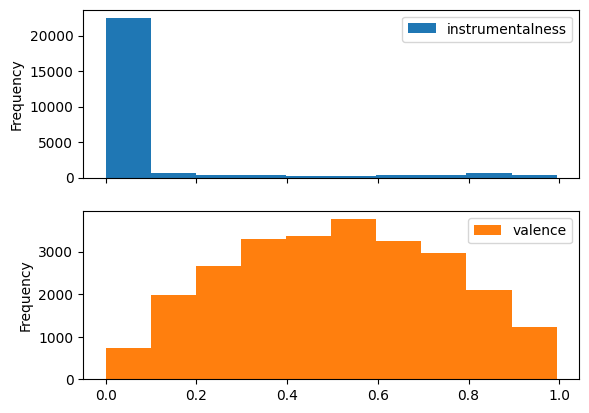

In [76]:
data[['instrumentalness', 'valence']].plot.hist(subplots=True)
plt.show()

# Valence has a normal distribution, we can impute mean

In [79]:
data['valence'] = data['valence'].fillna(data['valence'].mean())

In [81]:
data['instrumentalness'] = data['instrumentalness'].fillna(data['instrumentalness'].median())
data.isnull().sum()

,0
danceability,0
energy,0
loudness,0
speechiness,0
acousticness,0
instrumentalness,0
liveness,0
valence,0
tempo,0
genre,0


## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [ ]:
# Write your code here. Add as many boxes as you need.

## Feature Scaling
Standardize the features using `MinMaxScaler`.

In [ ]:
# Write your code here. Add as many boxes as you need.

## K-Nearset Neighbors Classification

Create an instance of the KNN Classification model and train it using the `fit` function.

In [ ]:
# Write your code here. Add as many boxes as you need.

Use the trained model to make predictions for the test set.

In [ ]:
# Write your code here. Add as many boxes as you need.

Assess the performance of the model by using different classification metrics provided by the `scikit-learn` library.

In [ ]:
# Write your code here. Add as many boxes as you need.

# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune the number of neighbors (`n_neighbors`) using a cross-validation with grid search. This involves systematically experimenting with various values for `n_neighbors` and evaluating the model's performance using cross-validation. Upon determining the most suitable `n_neighbors` value, evaluate the model's performance on a test set for final assessment.

Hint: Use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

In [ ]:
# Write your code here. Add as many boxes as you need.

## Feature Scaling
Standardize the features using `MinMaxScaler`.

In [ ]:
# Write your code here. Add as many boxes as you need.

## Fine-tuning the K-Nearset Neighbors Hyperparameter
Experiment with various values for `n_neighbors` and evaluate the model's performance using cross-validation.

In [ ]:
# Write your code here. Add as many boxes as you need.

## Final Assessment of the Model Performance
Upon determining the most suitable `n_neighbors` value, evaluate the model's performance on a test set for final assessment.

In [ ]:
# Write your code here. Add as many boxes as you need.